---
# Baixar dados direto do OpenStreetMap
---

In [1]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# Define a bounding box para Teresina [oeste, sul, leste, norte]
#
# bbox3km_zonaUrbana = (-42.863200, -5.259269, -42.626205, -4.929381) # BBOX do buffer de 3km da zona urbana
bbox_teresina = (-42.98,-5.59,-42.60,-4.79) # BBOX da município


In [3]:
# Baixa o grafo da rede viária dentro da bbox
G = ox.graph.graph_from_bbox(
    bbox=bbox_teresina,
    network_type='drive',  # Base para 'drive', 'bike', 'walk'
    simplify=True,         # Simplifica topologia (recomendado)
    retain_all=False       # Mantém apenas o maior componente conectado
)
print(f"Grafo baixado: {len(G.nodes)} nós e {len(G.edges)} arestas.")

Grafo baixado: 38879 nós e 109221 arestas.


In [4]:
# Converte nós e arestas em GeoDataFrames
nodes_gdf, edges_gdf = ox.convert.graph_to_gdfs(G)

In [5]:
nodes_gdf.head()

,y,x,street_count,highway,railway,geometry
osmid,,,,,,
320675484,-5.201404,-42.735460,3,NaN,NaN,POINT (-42.73546 -5.2014)
320676248,-5.200644,-42.757823,3,NaN,NaN,POINT (-42.75782 -5.20064)
320690061,-5.299390,-42.709246,3,NaN,NaN,POINT (-42.70925 -5.29939)
320690067,-5.322184,-42.699146,3,NaN,NaN,POINT (-42.69915 -5.32218)
320690144,-5.448727,-42.633836,3,NaN,NaN,POINT (-42.63384 -5.44873)


In [6]:
edges_gdf.head()

osmid      highway  \
u         v          key                            
320675484 6410704989 0      29154206     tertiary   
          2324896018 0     751454913  residential   
          7024989213 0    1035247058  residential   
320676248 4259896228 0     223606770     tertiary   
          3785736975 0    1328101424     tertiary   

                                                                   name  \
u         v          key                                                  
320675484 6410704989 0    Avenida Industrial Firmino da Silveira Soares   
          2324896018 0                                              NaN   
          7024989213 0                                              NaN   
320676248 4259896228 0                     Avenida Prefeito Wall Ferraz   
          3785736975 0    Avenida Industrial Firmino da Silveira Soares   

                          oneway reversed      length maxspeed  \
u         v          key                                         
320675484 6410704989 0     False     True  124.950320      NaN   
          2324896018 0     False     True   22.095088      NaN   
          7024989213 0     False    False   13.559657      NaN   
320676248 4259896228 0      True    False   53.482171       60   
          3785736975 0      True    False  944.368078      NaN   

                                                                   geometry  \
u         v          key                                                      
320675484 6410704989 0    LINESTRING (-42.73546 -5.2014, -42.73659 -5.20...   
          2324896018 0    LINESTRING (-42.73546 -5.2014, -42.73546 -5.20...   
          7024989213 0    LINESTRING (-42.73546 -5.2014, -42.73534 -5.20...   
320676248 4259896228 0    LINESTRING (-42.75782 -5.20064, -42.75795 -5.2...   
          3785736975 0    LINESTRING (-42.75782 -5.20064, -42.75781 -5.2...   

                          ref lanes bridge junction width access area  
u         v          key                                               
320675484 6410704989 0    NaN   NaN    NaN      NaN   NaN    NaN  NaN  
          2324896018 0    NaN   NaN    NaN      NaN   NaN    NaN  NaN  
          7024989213 0    NaN   NaN    NaN      NaN   NaN    NaN  NaN  
320676248 4259896228 0    NaN   NaN    NaN      NaN   NaN    NaN  NaN  
          3785736975 0    NaN   NaN    NaN      NaN   NaN    NaN  NaN

In [7]:
# Transforma o índice em uma coluna regular
nodes_gdf = nodes_gdf.reset_index()  # Transforma 'osmid' do índice para coluna
edges_gdf = edges_gdf.reset_index()  # Pode ter índice composto, também resetamos

In [8]:
print("--- TABELA DE NÓS com osmid como COLUNA ---")
nodes_gdf.head(3)

--- TABELA DE NÓS com osmid como COLUNA ---


,osmid,y,x,street_count,highway,railway,geometry
0,320675484,-5.201404,-42.735460,3,NaN,NaN,POINT (-42.73546 -5.2014)
1,320676248,-5.200644,-42.757823,3,NaN,NaN,POINT (-42.75782 -5.20064)
2,320690061,-5.299390,-42.709246,3,NaN,NaN,POINT (-42.70925 -5.29939)


In [9]:
print("\n--- TABELA DE ARESTAS (Ruas) ---")
# 'osmid' pode ser uma lista se o segmento funde múltiplas feições do OSM
edges_gdf[['osmid', 'u', 'v', 'length', 'geometry']].head(3)


--- TABELA DE ARESTAS (Ruas) ---


,osmid,u,v,length,geometry
0,29154206,320675484,6410704989,124.950320,"LINESTRING (-42.73546 -5.2014, -42.73659 -5.20..."
1,751454913,320675484,2324896018,22.095088,"LINESTRING (-42.73546 -5.2014, -42.73546 -5.20..."
2,1035247058,320675484,7024989213,13.559657,"LINESTRING (-42.73546 -5.2014, -42.73534 -5.20..."


In [10]:
# Verificar quais colunas existem
cols_desejadas = ['osmid', 'u', 'v', 'length', 'highway', 'geometry']
cols_existentes = [c for c in cols_desejadas if c in edges_gdf.columns]
edges_gdf[cols_existentes].head(3)

,osmid,u,v,length,highway,geometry
0,29154206,320675484,6410704989,124.950320,tertiary,"LINESTRING (-42.73546 -5.2014, -42.73659 -5.20..."
1,751454913,320675484,2324896018,22.095088,residential,"LINESTRING (-42.73546 -5.2014, -42.73546 -5.20..."
2,1035247058,320675484,7024989213,13.559657,residential,"LINESTRING (-42.73546 -5.2014, -42.73534 -5.20..."


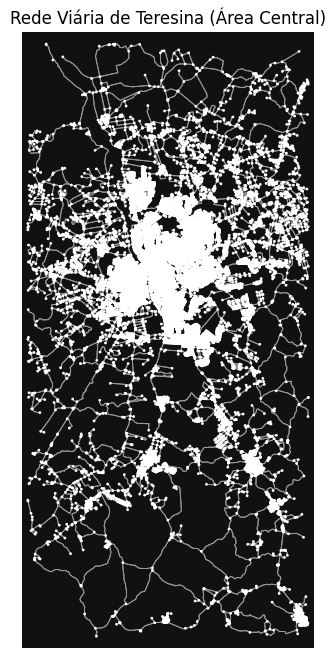

In [11]:
# Plota a rede viária
fig, ax = ox.plot_graph(
    G,
    node_size=4,    # Tamanho dos nós (interseções)
    edge_linewidth=0.7, # Espessura das linhas (ruas)
    show=False,
    close=False
)
ax.set_title("Rede Viária de Teresina (Área Central)")
plt.show()

In [13]:
# Estatísticas descritivas básicas da rede
basic_stats = ox.basic_stats(G)
basic_stats

{'n': 38879,
 'm': 109221,
 'k_avg': 5.618508706499653,
 'edge_length_total': 15505959.32572191,
 'edge_length_avg': 141.9686628553292,
 'streets_per_node_avg': 3.073870212711232,
 'streets_per_node_counts': {0: 0,
  1: 4135,
  2: 28,
  3: 23596,
  4: 11072,
  5: 46,
  6: 2},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.10635561614239049,
  2: 0.000720183132282209,
  3: 0.6069086139046787,
  4: 0.28478098716530775,
  5: 0.0011831580030350576,
  6: 5.144165230587206e-05},
 'intersection_count': 34744,
 'street_length_total': 8220382.53667265,
 'street_segment_count': 59702,
 'street_length_avg': 137.69023712225135,
 'circuity_avg': 1.0429041514034731,
 'self_loop_proportion': 0.0003684968677766239}

In [14]:
#print(f"Densidade de interseções: {basic_stats['intersection_density_km']:.1f} por km²")
print(f"Comprimento total da via: {basic_stats['street_length_total']:.0f} metros")

Comprimento total da via: 8220383 metros


In [15]:
# Salva como GraphML (preserva a estrutura completa do grafo para o NetworkX/OSMnx)
ox.io.save_graphml(G, filepath='../dados/brutos/osmnx/the_bbox_osm_grafo.graphml')

# Salva como GeoPackage (para abrir no QGIS ou outras ferramentas GIS)
ox.io.save_graph_geopackage(G, filepath='../dados/brutos/osmnx/the_bbox_osm_grafo.gpkg')